<a href="https://colab.research.google.com/github/AndreMoreira00/Linguagem-Natural/blob/main/index.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linguagem Natural

In [1]:
import bs4 as bs
import urllib.request
import spacy
import nltk

In [2]:
!python -m spacy download pt_core_news_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 36.5 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('pt_core_news_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


## Marcação POS

In [3]:
pln = spacy.load('pt_core_news_sm')
pln

In [4]:
documento = pln('Estou aprendendo Linguagem Natural')

In [5]:
type(documento)

spacy.tokens.doc.Doc

In [6]:
for token in documento:
    print(token.text, token.pos_)

Estou AUX
aprendendo VERB
Linguagem PROPN
Natural PROPN


## Lematização e stemização

In [7]:
for token in documento:
    print(token.text, token.lemma_)

Estou estar
aprendendo aprender
Linguagem Linguagem
Natural Natural


In [8]:
doc = pln('encontrei encontraram encontrariam encontrarão encontrariam cursando curso cursando cursamos cursei')

In [9]:
[token.lemma_ for token in doc]

['encontrar',
 'encontrar',
 'encontrar',
 'encontrar',
 'encontrar',
 'cursar',
 'curso',
 'cursar',
 'cursar',
 'cursar']

In [10]:
import nltk
nltk.download('rslp')

[nltk_data] Downloading package rslp to /root/nltk_data...
[nltk_data]   Unzipping stemmers/rslp.zip.


True

In [11]:
stemmer = nltk.stem.RSLPStemmer()
stemmer.stem('aprender')

'aprend'

In [12]:
for token in documento:
    print(token.text, token.lemma_, stemmer.stem(token.text))

Estou estar est
aprendendo aprender aprend
Linguagem Linguagem lingu
Natural Natural natur


## Carregamento dos textos

In [13]:
dados = urllib.request.urlopen('https://pt.wikipedia.org/wiki/Intelig%C3%AAncia_artificial')

In [14]:
dados = dados.read()
dados

b'<!DOCTYPE html>\n<html class="client-nojs vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpref-1 vector-feature-limited-width-content-enabled vector-feature-custom-font-size-clientpref-1 vector-feature-appearance-enabled vector-feature-appearance-pinned-clientpref-1 vector-feature-night-mode-enabled skin-theme-clientpref-day vector-toc-available" lang="pt" dir="ltr">\n<head>\n<meta charset="UTF-8">\n<title>Intelig\xc3\xaancia artificial \xe2\x80\x93 Wikip\xc3\xa9dia, a enciclop\xc3\xa9dia livre</title>\n<script>(function(){var className="client-js vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-c

In [15]:
dados_html = bs.BeautifulSoup(dados, 'lxml')
dados_html

<!DOCTYPE html>
<html class="client-nojs vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpref-1 vector-feature-limited-width-content-enabled vector-feature-custom-font-size-clientpref-1 vector-feature-appearance-enabled vector-feature-appearance-pinned-clientpref-1 vector-feature-night-mode-enabled skin-theme-clientpref-day vector-toc-available" dir="ltr" lang="pt">
<head>
<meta charset="utf-8"/>
<title>Inteligência artificial – Wikipédia, a enciclopédia livre</title>
<script>(function(){var className="client-js vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-p

In [16]:
paragrafos = dados_html.find_all('p')
paragrafos

[<p>A <b>inteligência artificial</b> (de sigla: <b>IA</b>; do <a href="/wiki/L%C3%ADngua_inglesa" title="Língua inglesa">inglês</a>: <i>artificial intelligence</i>, de sigla: <b>AI</b>) é um campo de estudo multidisciplinar que abrange varias áreas do conhecimento.<sup class="reference" id="cite_ref-:0_1-0"><a href="#cite_note-:0-1"><span>[</span>1<span>]</span></a></sup><sup class="reference" id="cite_ref-:1_2-0"><a href="#cite_note-:1-2"><span>[</span>2<span>]</span></a></sup> É também um conjunto de <a href="/wiki/Tecnologias_emergentes" title="Tecnologias emergentes">novas tecnologias</a> que permitem aos aparelhos smart executarem várias funções avançadas de modo quase autônomo,<sup class="reference" id="cite_ref-:1_2-1"><a href="#cite_note-:1-2"><span>[</span>2<span>]</span></a></sup><sup class="reference" id="cite_ref-:2_3-0"><a href="#cite_note-:2-3"><span>[</span>3<span>]</span></a></sup> representanto um <a href="/wiki/Revolu%C3%A7%C3%A3o_da_informa%C3%A7%C3%A3o" title="Revol

In [17]:
len(paragrafos)

65

In [18]:
paragrafos[0]

<p>A <b>inteligência artificial</b> (de sigla: <b>IA</b>; do <a href="/wiki/L%C3%ADngua_inglesa" title="Língua inglesa">inglês</a>: <i>artificial intelligence</i>, de sigla: <b>AI</b>) é um campo de estudo multidisciplinar que abrange varias áreas do conhecimento.<sup class="reference" id="cite_ref-:0_1-0"><a href="#cite_note-:0-1"><span>[</span>1<span>]</span></a></sup><sup class="reference" id="cite_ref-:1_2-0"><a href="#cite_note-:1-2"><span>[</span>2<span>]</span></a></sup> É também um conjunto de <a href="/wiki/Tecnologias_emergentes" title="Tecnologias emergentes">novas tecnologias</a> que permitem aos aparelhos smart executarem várias funções avançadas de modo quase autônomo,<sup class="reference" id="cite_ref-:1_2-1"><a href="#cite_note-:1-2"><span>[</span>2<span>]</span></a></sup><sup class="reference" id="cite_ref-:2_3-0"><a href="#cite_note-:2-3"><span>[</span>3<span>]</span></a></sup> representanto um <a href="/wiki/Revolu%C3%A7%C3%A3o_da_informa%C3%A7%C3%A3o" title="Revolu

In [19]:
paragrafos[1].text

'Algumas das principais áreas relacionadas à IA incluem:\n'

In [20]:
conteudo = ''
for p in paragrafos:
  conteudo += p.text

In [21]:
conteudo

'A inteligência artificial (de sigla: IA; do inglês: artificial intelligence, de sigla: AI) é um campo de estudo multidisciplinar que abrange varias áreas do conhecimento.[1][2] É também um conjunto de novas tecnologias que permitem aos aparelhos smart executarem várias funções avançadas de modo quase autônomo,[2][3] representanto um marco histórico na computação moderna.[3] Embora seu desenvolvimento tenha avançado mais na ciência da computação, sua abordagem interdisciplinar envolve contribuições de diversas disciplina.\nAlgumas das principais áreas relacionadas à IA incluem:\nÉ difícil definir especificamente a Inteligência Artificial, mas ao longo do tempo seguiu essas quatro linhas de pensamento:[1]\nÉ um conceito amplo e que recebe tantas definições quanto significados diferentes à palavra inteligência.[4] É possível considerar algumas características básicas desses sistemas, como a capacidade de raciocínio (aplicar regras lógicas a um conjunto de dados disponíveis para chegar a 

In [22]:
conteudo = conteudo.lower()
conteudo

'a inteligência artificial (de sigla: ia; do inglês: artificial intelligence, de sigla: ai) é um campo de estudo multidisciplinar que abrange varias áreas do conhecimento.[1][2] é também um conjunto de novas tecnologias que permitem aos aparelhos smart executarem várias funções avançadas de modo quase autônomo,[2][3] representanto um marco histórico na computação moderna.[3] embora seu desenvolvimento tenha avançado mais na ciência da computação, sua abordagem interdisciplinar envolve contribuições de diversas disciplina.\nalgumas das principais áreas relacionadas à ia incluem:\né difícil definir especificamente a inteligência artificial, mas ao longo do tempo seguiu essas quatro linhas de pensamento:[1]\né um conceito amplo e que recebe tantas definições quanto significados diferentes à palavra inteligência.[4] é possível considerar algumas características básicas desses sistemas, como a capacidade de raciocínio (aplicar regras lógicas a um conjunto de dados disponíveis para chegar a 

## Buscas em textos usando spaCy

In [23]:
pln = spacy.load('pt_core_news_sm')
pln

In [24]:
string = 'turing'
token_pesquisa = pln(string)

In [25]:
from spacy.matcher import PhraseMatcher
matcher = PhraseMatcher(pln.vocab)
matcher.add('Saerch', None, token_pesquisa)

In [26]:
doc = pln(conteudo)
matches = matcher(doc)
matches

[(6587034637250096448, 3463, 3464),
 (6587034637250096448, 3473, 3474),
 (6587034637250096448, 3629, 3630),
 (6587034637250096448, 3634, 3635),
 (6587034637250096448, 3640, 3641),
 (6587034637250096448, 3703, 3704),
 (6587034637250096448, 4356, 4357),
 (6587034637250096448, 5573, 5574),
 (6587034637250096448, 5708, 5709),
 (6587034637250096448, 5803, 5804),
 (6587034637250096448, 5920, 5921)]

In [27]:
doc[3463:3464]

turing

In [28]:
from IPython.core.display import HTML
texto = ''
numero_palavras = 50
doc = pln(conteudo)
matches = matcher(doc)
display(HTML(f'<h1>Busca por {string.upper()}</h1>'))
display(HTML(f""" <p><strong>Resultados Encontrados:</strong> {len(matches)}</p>"""))
for i in matches:
  inicio = i[1] - numero_palavras
  if inicio < 0:
    inicio = 0
  texto += str(doc[inicio: i[2] + numero_palavras]).replace(string, f"<mark>{string}</mark>")
  texto += '<br /><br />'
display(HTML(f"""... {texto} ..."""))


## Extração entidades nomeadas

In [29]:
for entidades in doc.ents:
  print(entidades.text, entidades.label_)

pensamento:[1 MISC
segunda guerra mundial MISC
computing machinery and intelligence MISC
alan PER
herbert simon PER
allen newell PER
john mccarthy PER
warren mcculloch PER
walter pitts PER
marvin minsky PER
frankenstein MISC
aristóteles PER
alexandre PER
herbert simon PER
john mccarthy PER
brasil LOC
allen newell PER
herbert simon PER
mccarty PER
marvin minsky PER
mit ORG
darthmouth LOC
estados unidos LOC
fifth generation MISC
japão LOC
prolog MISC
gpt-3[21 MISC
google ORG
wikipédia MISC
john mccarthy PER
andreas kaplan PER
michael haenlein definem PER
john mccarthy PER
john haugeland PER
good PER
w. grey walter PER
besta de johns hopkins ORG
universidade de princeton LOC
ratio club LOC
inglaterra LOC
david rumelhart PER
isaac asimov PER
steven spielberg PER
robótica.[8 ORG
stephen hawking PER
alan turing PER
turing PER
turing PER
turing PER
turing PER
turing PER
joseph weizenbaum PER
mit ORG
a.l.i.c.e MISC
java MISC
intelligence markup language PER
alicebots LOC
programáveis.[35][36 O

In [30]:
from spacy import displacy
displacy.render(doc, style='ent', jupyter=True)

## Nuvem de palavras com stopWords

In [36]:
from spacy.lang.pt.stop_words import STOP_WORDS
print(STOP_WORDS)

{'des', 'aqueles', 'grupo', 'maioria', 'tempo', 'lado', 'deve', 'pelas', 'tão', 'você', 'nesta', 'aí', 'exemplo', 'mais', 'tens', 'zero', 'ao', 'cá', 'dentro', 'fim', 'todas', 'tudo', 'todos', 'como', 'posição', 'quinze', 'fazia', 'teus', 'quarta', 'tipo', 'questão', 'pontos', 'sois', 'eu', 'às', 'eles', 'conhecida', 'sexta', 'posso', 'aquela', 'tanto', 'duas', 'cento', 'inclusive', 'vez', 'nossos', 'se', 'nesse', 'debaixo', 'boa', 'segunda', 'te', 'aqui', 'nível', 'ontem', 'porquê', 'longe', 'aquele', 'faz', 'vossas', 'momento', 'muito', 'suas', 'doze', 'fora', 'teve', 'um', 'cinco', 'com', 'geral', 'adeus', 'sexto', 'estás', 'através', 'ligado', 'obrigada', 'novo', 'pelo', 'coisa', 'és', 'meu', 'sobre', 'outras', 'pôde', 'lhe', 'certamente', 'sétima', 'logo', 'contra', 'sou', 'grandes', 'são', 'quê', 'vinte', 'aos', 'me', 'daquele', 'vais', 'tua', 'sistema', 'em', 'entre', 'fazem', 'porquanto', 'último', 'pouco', 'está', 'antes', 'custa', 'breve', 'embora', 'grande', 'isto', 'ter', '

In [37]:
len(STOP_WORDS)

416

In [38]:
pln.vocab['inteligencia'].is_stop

False

In [39]:
doc = pln(conteudo)
lista_tokens = []
for token in doc:
  lista_tokens.append(token.text)

print(lista_tokens)

['a', 'inteligência', 'artificial', '(', 'de', 'sigla', ':', 'ia', ';', 'do', 'inglês', ':', 'artificial', 'intelligence', ',', 'de', 'sigla', ':', 'ai', ')', 'é', 'um', 'campo', 'de', 'estudo', 'multidisciplinar', 'que', 'abrange', 'varias', 'áreas', 'do', 'conhecimento.[1][2', ']', 'é', 'também', 'um', 'conjunto', 'de', 'novas', 'tecnologias', 'que', 'permitem', 'aos', 'aparelhos', 'smart', 'executarem', 'várias', 'funções', 'avançadas', 'de', 'modo', 'quase', 'autônomo,[2][3', ']', 'representanto', 'um', 'marco', 'histórico', 'na', 'computação', 'moderna.[3', ']', 'embora', 'seu', 'desenvolvimento', 'tenha', 'avançado', 'mais', 'na', 'ciência', 'da', 'computação', ',', 'sua', 'abordagem', 'interdisciplinar', 'envolve', 'contribuições', 'de', 'diversas', 'disciplina', '.', '\n', 'algumas', 'das', 'principais', 'áreas', 'relacionadas', 'à', 'ia', 'incluem', ':', '\n', 'é', 'difícil', 'definir', 'especificamente', 'a', 'inteligência', 'artificial', ',', 'mas', 'ao', 'longo', 'do', 'tem

In [40]:
sem_stop_words = []
for palavra in lista_tokens:
  if pln.vocab[palavra].is_stop == False:
    sem_stop_words.append(palavra)

In [41]:
len(sem_stop_words)

3660

In [31]:
from matplotlib.colors import ListedColormap
color_map = ListedColormap(['orange', 'green', 'red', 'magenta'])

In [32]:
from wordcloud import WordCloud
cloud = WordCloud(background_color='white', max_words=100, colormap=color_map)

<function matplotlib.pyplot.show(close=None, block=None)>

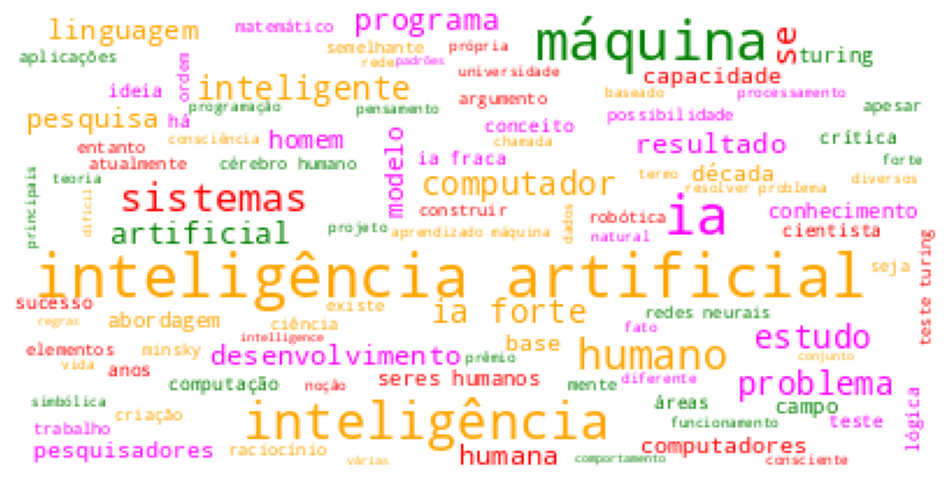

In [43]:
import matplotlib.pyplot as plt
cloud = cloud.generate(' '.join(sem_stop_words))
plt.figure(figsize=(12,12))
plt.imshow(cloud)
plt.axis('off')
plt.show